# Visualization
In this notebook, we're going to explore what the model we have trained actually learned.
This involves some of the following things:
* **Verify that we actually get better while learning**
* Look at the motifs we learn
* What does the hidden layer tell us about the model

In [7]:
%matplotlib inline

# some always important inputs
import sys
import os
import random
import time
import numpy as np

# the underlying convRBM implementation
sys.path.append(os.path.abspath('../code'))
from convRBM import CRBM
import getData as dataRead

# plotting and data handling
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split

# the biopython stuff
import Bio.SeqIO as sio
import Bio.motifs.matrix as mat
from Bio.Alphabet import IUPAC
from Bio.Seq import Seq
from Bio import motifs

ERROR (theano.sandbox.cuda): Failed to compile cuda_ndarray.cu: libcublas.so.7.0: cannot open shared object file: No such file or directory
ERROR:theano.sandbox.cuda:Failed to compile cuda_ndarray.cu: libcublas.so.7.0: cannot open shared object file: No such file or directory
WARNING (theano.sandbox.cuda): CUDA is installed, but device gpu is not available  (error: cuda unavilable)


Couldn't import dot_parser, loading of dot files will not be possible.


## Read in the data and train our model
This part of the notebook trains a convolutional RBM on the DHS data. This may take a lot of time but only once we trained it, will it be possible to do the visualization of what the model learnt.

In [8]:
seqReader = dataRead.FASTAReader()
allSeqs = seqReader.readSequencesFromFile('../data/wgEncodeAwgDnaseUwAg10803UniPk.fa')

data = [allSeqs[random.randrange(0,len(allSeqs))] for i in range(20000)]
train_set, test_set = train_test_split(data, test_size=0.25)
print "Training set size: " + str(len(train_set))
print "Test set size: " + str(len(test_set))

start = time.time()
trainingData = np.array([dataRead.getMatrixFromSeq(t) for t in train_set])
testingData = np.array([dataRead.getMatrixFromSeq(t) for t in test_set])
print "Conversion of test set in (in ms): " + str((time.time()-start)*1000)

Training set size: 15000
Test set size: 5000
Conversion of test set in (in ms): 3284.79385376


Data mat shape: (15000, 1, 4, 150)
BatchSize: 10
Num of iterations per epoch: 1500
Compilation of theano function finished in 5.27771496773 seconds
Start training...
Initial Reconstruction Error: 12807.2460938
[Epoch 0] Reconstruction Error: 12679.3662109
[Epoch 1] Reconstruction Error: 12398.3808594
[Epoch 2] Reconstruction Error: 11961.2861328
[Epoch 3] Reconstruction Error: 11611.2705078
[Epoch 4] Reconstruction Error: 11411.4238281
[Epoch 5] Reconstruction Error: 11298.7851562
[Epoch 6] Reconstruction Error: 11223.4560547
[Epoch 7] Reconstruction Error: 11161.3886719
[Epoch 8] Reconstruction Error: 11104.1650391
[Epoch 9] Reconstruction Error: 11049.2705078
Training finished after: 144.337275982 seconds!
Training of 15000 performed in: 149.626496077 seconds.


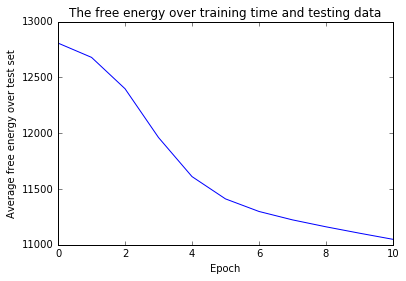

In [9]:
learner = CRBM(3, 20, 0.001, 2)
print "Data mat shape: " + str(trainingData.shape)
start = time.time()
scores = learner.trainMinibatch(trainingData, testingData, 10, 10, 1)
print "Training of " + str(trainingData.shape[0]) + " performed in: " + str(time.time()-start) + " seconds."
plt.plot(scores)
plt.ylabel('Average free energy over test set')
plt.xlabel('Epoch')
plt.title('The free energy over training time and testing data')
plt.show()

## Time for visualizing things

In [ ]:
def getLetterToInt (num):
    if num == 0:
        return 'A'
    elif num == 1:
        return 'C'
    elif num == 2:
        return 'G'
    elif num == 3:
        return 'T'
    else:
        print 'ERROR: Num ' + str(num) + " not a valid char in DNA alphabet"
        return -1

def createMotifFromMatrix (matrix, alphabet=IUPAC.unambiguous_dna):
    assert matrix.shape[0] == 4
    counts = {}
    for row in range(4):
        counts[getLetterToInt(row)] = matrix[row].tolist()
    motif = Motif(alphabet=alphabet, instances=None, counts=counts)
    return motif
        
        

In [ ]:
# first, get the motifs into single 2D matrices within a list
motifs = []
M = learner.motifs.get_value()
for i in range(0, M.shape[0], 2):
    motifs.append(M[i,0])
    
print motifs[0]

In [5]:
import sys
sys.version

'2.7.10 (default, Nov 21 2015, 17:46:33) \n[GCC 4.8.2]'